<a href="https://colab.research.google.com/github/Jkia65/Assignment-3-Python-Refresher/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Product: Amazon Alexa**


## **Assignment Natural Language processsing - Sentiment Analysis**

### **Customer Review Classification using Random Forest**

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- **The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.** Positive or Negative review?
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews also provided(`amazon_alexa.tsv`)
---




### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a classification model.**



**Dataset Information:**

The dataset consists of customer reviews for Amazon Alexa products, including various features related to the product variation, customer rating, and feedback sentiment.

_Features/Columns_:
* rating: The customer rating of the product (scale of 1 to 5).
* date: The date when the review was posted.
* variation: The variation or type of Alexa product the review is for (e.g., "Charcoal Fabric", "Walnut Finish").
* verified_reviews: The actual review text written by the customer.
* feedback: The target variable indicating the sentiment of the review (1 for positive sentiment and 0 for negative sentiment).



---




In [3]:
# Amazon Alexa Customer Review Sentiment Analysis
# Objective: Classify reviews as positive or negative using Random Forest




# TODO: Import necessary libraries
# Hint: You'll need pandas, numpy, matplotlib, seaborn, and various sklearn modules

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# TODO: Load the dataset
# Hint: Use pandas to read the CSV file from your Google Drive

# Data Visualization and Clean Up
# TODO: Visualize the distribution of feedback
# Hint: Use seaborn's countplot function

# TODO: Visualize the relationship between variations and ratings
# Hint: Use seaborn's barplot function

# TODO: Drop irrelevant columns
# Hint: Use the drop() method to remove 'date' and 'rating' columns

# One-Hot Encoding
# TODO: Perform one-hot encoding on the 'variation' column
# Hint: Use pandas get_dummies() function

# Tokenization (Count Vectorizer)
# TODO: Tokenize the 'verified_reviews' column
# Hint: Use CountVectorizer from sklearn.feature_extraction.text

# TODO: Combine tokenized reviews with the main dataframe
# Hint: Use pd.concat() to join the dataframes

# Prepare data for modeling
# TODO: Split the data into features (X) and target (y)
# Hint: The target variable is 'feedback'

# TODO: Split the data into training and testing sets
# Hint: Use train_test_split from sklearn.model_selection

# Train the Random Forest model
# TODO: Create and train the Random Forest model
# Hint: Use RandomForestClassifier from sklearn.ensemble

# Evaluate the model
# TODO: Generate predictions and create confusion matrix
# Hint: Use the predict() method and confusion_matrix from sklearn.metrics

# TODO: Plot confusion matrix
# Hint: Use seaborn's heatmap function

# TODO: Print classification report
# Hint: Use classification_report from sklearn.metrics

# Feature Importance
# TODO: Visualize feature importance
# Hint: Access feature_importances_ attribute of the trained model

# TODO: Make predictions on new data
# Hint: Create a function that takes a new review text, preprocesses it,
# and uses the trained model to predict its sentiment

# Example usage of your prediction function:
# new_review = "I love my Alexa device! It's so helpful."
# predicted_sentiment = predict_sentiment(new_review)
# print(f"The sentiment of the new review is: {predicted_sentiment}")

Mounted at /content/drive


In [20]:
# Task 1: Import Libraries and Dataset

# Hint: You need to import libraries like pandas, numpy, matplotlib, seaborn, etc.
# Don't forget to mount Google Drive and load the CSV file using pandas.
# Use `pd.read_csv()` to load the data into a pandas DataFrame.

# TODO: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# TODO: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# TODO: Load the dataset into a DataFrame and preview the first few rows.

uploaded = files.upload()  # amazon_alexa.tsv
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]), sep='\t')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving amazon_alexa.tsv to amazon_alexa (1).tsv


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


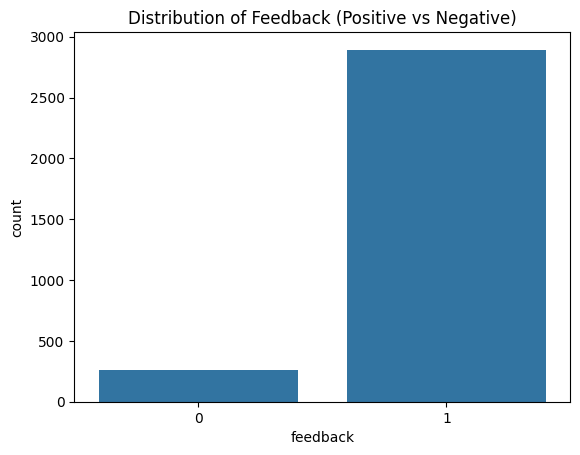

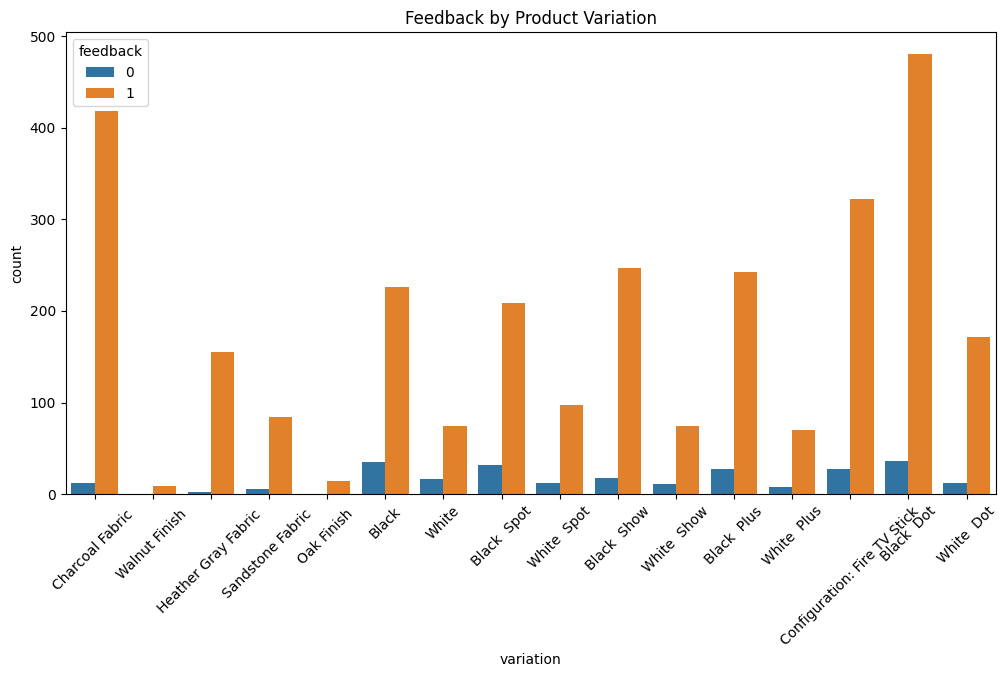

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [21]:
# Task 2: Visualize Feedback and Product Variation
# Hint: Use `sns.countplot()` to visualize the feedback distribution and a bar plot to compare variations and feedback.
# Drop the columns 'date' and 'rating' as they are not relevant for the analysis.

# TODO: Visualize the distribution of feedback (positive/negative)
sns.countplot(x='feedback', data=df)
plt.title('Distribution of Feedback (Positive vs Negative)')
plt.show()

# TODO: Visualize the relationship between product variation and feedback
plt.figure(figsize=(12,6))
sns.countplot(x='variation', hue='feedback', data=df)
plt.xticks(rotation=45)
plt.title('Feedback by Product Variation')
plt.show()


# TODO: Drop irrelevant columns ('date', 'rating')
df = df.drop(['date', 'rating'], axis=1)
df.head()

In [22]:
# Task 3: One-Hot Encoding for 'variation'
# Hint: Use `pd.get_dummies()` to create one-hot encoded columns for 'variation'.
# Then, concatenate these encoded columns back to the original DataFrame and drop the 'variation' column.

# TODO: Perform one-hot encoding on the 'variation' column
variation_encoded = pd.get_dummies(df['variation'], prefix='variation')
df = pd.concat([df, variation_encoded], axis=1)
df = df.drop('variation', axis=1)
df.head()

,verified_reviews,feedback,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [23]:
# Task 4: Tokenize 'verified_reviews' using CountVectorizer
# Hint: Use `CountVectorizer` to tokenize the text data and convert it into numerical representation.
# After transforming the text, drop the 'verified_reviews' column and concatenate the numerical data with the rest of the DataFrame.

# TODO: Tokenize the 'verified_reviews' column using CountVectorizer
# Fill missing text entries to avoid errors
df['verified_reviews'] = df['verified_reviews'].fillna('')

vectorizer = CountVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df['verified_reviews'])

# Convert sparse matrix to DataFrame for concatenation
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

# Drop 'verified_reviews' column and concatenate numerical data
df = df.drop('verified_reviews', axis=1)
df = pd.concat([df.reset_index(drop=True), X_text_df.reset_index(drop=True)], axis=1)

# Separate features and target
X = df.drop('feedback', axis=1)
y = df['feedback']

In [24]:
# Task 5: Split Data into Training and Testing Sets
# Hint: Use `train_test_split()` to split the data into training and testing sets.
# You need to specify `test_size=0.2` to reserve 20% of the data for testing.

# TODO: Split the data into training and testing sets


# Just to ensure y is a 1-dimensional Series so that train_test_split and value_counts work correctly
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm split and class distribution
print("Data split complete.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Class distribution:\n", y.value_counts())

Data split complete.
Train shape: (2520, 3799)
Test shape: (630, 3799)
Class distribution:
 feedback
1    2893
0     257
Name: count, dtype: int64


In [25]:
# Task 6: Define and Train Random Forest Classifier
# Hint: Initialize a `RandomForestClassifier` with 100 estimators.
# Use the `fit()` method to train the model on the training data.

# TODO: Define and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

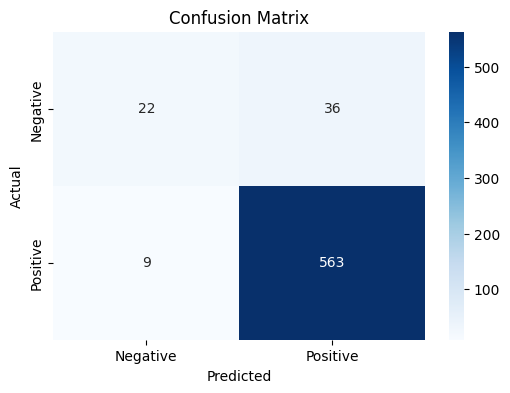

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.38      0.49        58
           1       0.94      0.98      0.96       572

    accuracy                           0.93       630
   macro avg       0.82      0.68      0.73       630
weighted avg       0.92      0.93      0.92       630



In [26]:
# Task 7: Generate Predictions and Evaluate Model
# Hint: Use the `predict()` method to generate predictions for the test data.
# Use `confusion_matrix()` to create the confusion matrix and visualize it using a heatmap.
# Print out a `classification_report()` to evaluate the model's precision, recall, and F1 score.

# TODO: Generate predictions and evaluate the model's performance using a confusion matrix and classification report
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

In [27]:
# Task 8: Analyze Model Performance
# Hint: Use the `score()` method to calculate accuracy for both training and test sets.
# Compare the results and discuss if the model is overfitting or underfitting.

# TODO: Compare training and testing accuracy and discuss model performance
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.05:
    print("The model may be slightly overfitting (high training accuracy, lower test accuracy).")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting.")
else:
    print("The model has balanced performance on training and testing data.")

Training Accuracy: 0.9964
Testing Accuracy: 0.9286
The model may be slightly overfitting (high training accuracy, lower test accuracy).
